c:\Users\DHARANI\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Dataset shape: (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94



Feature preview (first 5 rows):
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]

After OneHotEncoding, feature shape: (50, 6)

First 5 rows after encoding:
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]
Training samples: 40
Test samples: 10
Intercept: 42467.5292485298
Number of coefficients: 6


,Actual Profit,Predicted Profit
0,103282.38,103015.20
1,144259.40,132582.28
2,146121.95,132447.74
3,77798.83,71976.10
4,191050.39,178537.48
5,105008.31,116161.24
6,81229.06,67851.69
7,97483.56,98791.73
8,110352.25,113969.44
9,166187.94,167921.07


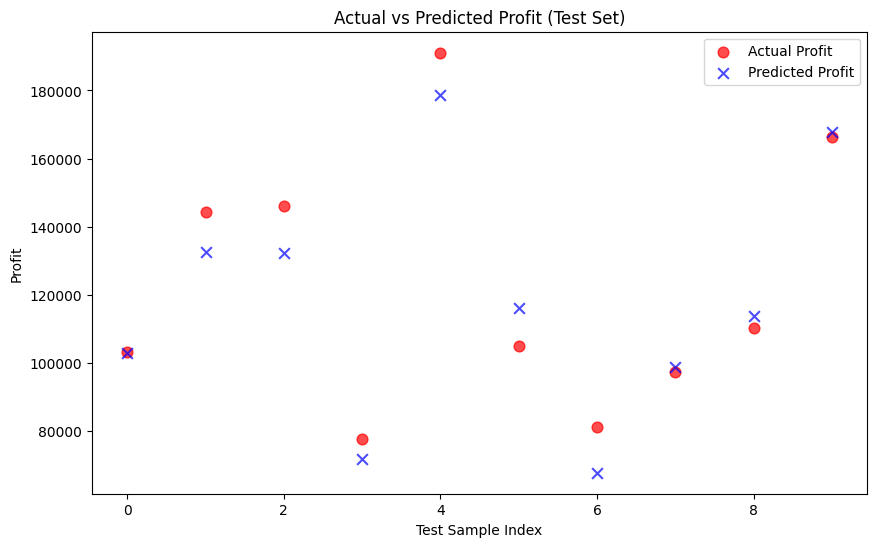

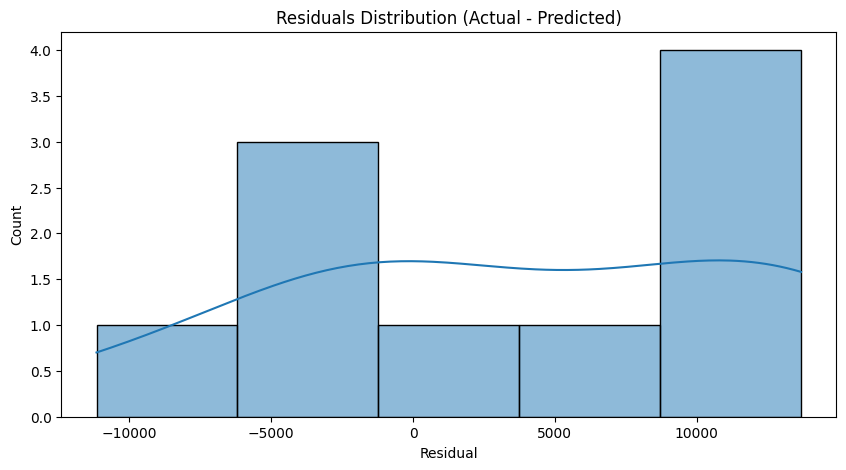

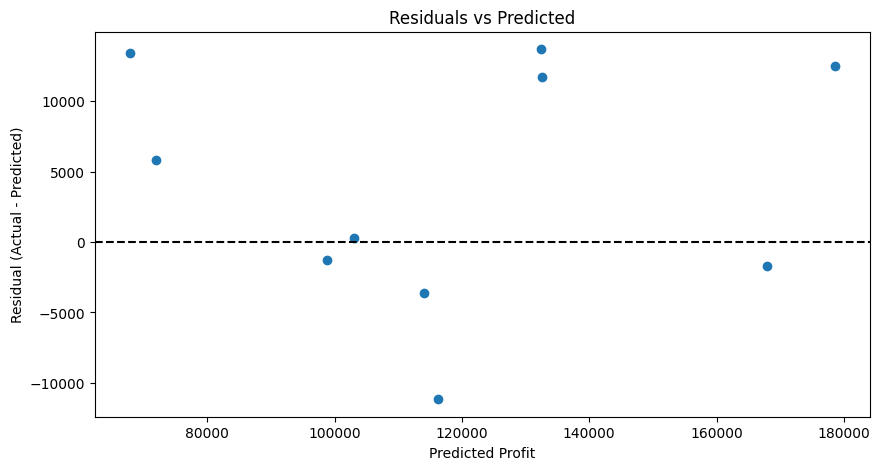

Mean Squared Error (MSE): 83502864.03
R^2 Score: 0.9347

Sample startup predicted profit: 181566.92389383633


In [1]:
# 1) Data Preprocessing - Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
 
# %matplotlib inline
# sns.set(style='whitegrid')
 
# from google.colab import drive
 
# # Mount your Drive
# drive.mount('/content/drive')
 
# # Once mounted, navigate to the folder
# # Example path (adjust based on your structure)
# path = '/content/drive/My Drive/Data Sets/50_Startups.csv'
 
dataset = pd.read_csv("50_Startups.csv")
print('Dataset shape:', dataset.shape)
display(dataset.head())
 
# Separate features and target
X = dataset.iloc[:, :-1].values  # all columns except last (Profit)
y = dataset.iloc[:, -1].values   # last column (Profit)
 
print('\nFeature preview (first 5 rows):')
print(X[:5])
 
# Encode categorical 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
 
# Convert to numpy array and inspect
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])
 
 
# 2) Fit Model - Code
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))
 
 
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))
 
 
# 4) Visualization - Code
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()
 
 
# Evaluation metrics & sample prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')
 
# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
raw_sample = np.array([[160000, 130000, 300000, 'California']])
encoded_sample = ct.transform(raw_sample)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample startup predicted profit:', float(pred_sample[0]))

 
 

# Advertising channels dataset

Business Scenario

A consumer goods company promotes its product using multiple advertising channels:

Television (TV)

Radio

Newspaper

The company wants to understand:

“How do different advertising channels together influence product sales?”

They also want to predict future sales based on planned advertising budgets.

You are appointed as a Data Analyst to analyze the data and build a predictive model.

📝 Tasks

Load the dataset and examine the available columns.

Use TV, Radio, and Newspaper advertising spends as input features.

Use Sales as the target variable.

Build a model that learns the relationship between advertising spends and sales.

Train the model using historical data.

Predict sales for unseen data points.

Predict sales when the advertising budget is:

TV = 150

Radio = 20

Newspaper = 30

Evaluate the model’s prediction error.

Interpret the coefficients of the model:

Which advertising medium has the strongest impact on sales?

Which medium has the least impact?

Visualize:

Actual sales vs predicted sales

Based on your analysis, suggest:

One business recommendation to improve sales


One technical improvement to improve prediction accuracy


 

1. Load the dataset and examine the available columns.



In [2]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


2. Use TV, Radio, and Newspaper advertising spends as input features.



In [3]:
X=df[["TV","Radio","Newspaper"]]
y=df["Sales"]
X,y

(        TV  Radio  Newspaper
 0    230.1   37.8       69.2
 1     44.5   39.3       45.1
 2     17.2   45.9       69.3
 3    151.5   41.3       58.5
 4    180.8   10.8       58.4
 ..     ...    ...        ...
 195   38.2    3.7       13.8
 196   94.2    4.9        8.1
 197  177.0    9.3        6.4
 198  283.6   42.0       66.2
 199  232.1    8.6        8.7
 
 [200 rows x 3 columns],
 0      22.1
 1      10.4
 2      12.0
 3      16.5
 4      17.9
        ... 
 195     7.6
 196    14.0
 197    14.8
 198    25.5
 199    18.4
 Name: Sales, Length: 200, dtype: float64)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Use Sales as the target variable.

Build a model that learns the relationship between advertising spends and sales.

Train the model using historical data.




In [5]:
model=LinearRegression()
model.fit(X_train,y_train)

print("slopes=",model.coef_)
print("intercept:",model.intercept_)

 


slopes= [0.05450927 0.10094536 0.00433665]
intercept: 4.714126402214127


Predict sales for unseen data points.



In [6]:
# 3) Predict - Code
# Predicting Test set results
y_pred = model.predict(X_test)
print(y_pred)

new=np.array([[150,110,200]])
a=model.predict(new)
print(a)
 


[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]
[24.86183626]


c:\Users\DHARANI\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predict sales when the advertising budget is:

TV = 150

Radio = 20

Newspaper = 30

Evaluate the model’s prediction error.

Interpret the coefficients of the model:

Which advertising medium has the strongest impact on sales?

Which medium has the least impact?

In [7]:
new=np.array([[150,20,30]])
a=model.predict(new)
print(a)

err=mean_squared_error(y_test,y_pred)
print(err)

[15.03952368]
2.9077569102710896


c:\Users\DHARANI\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


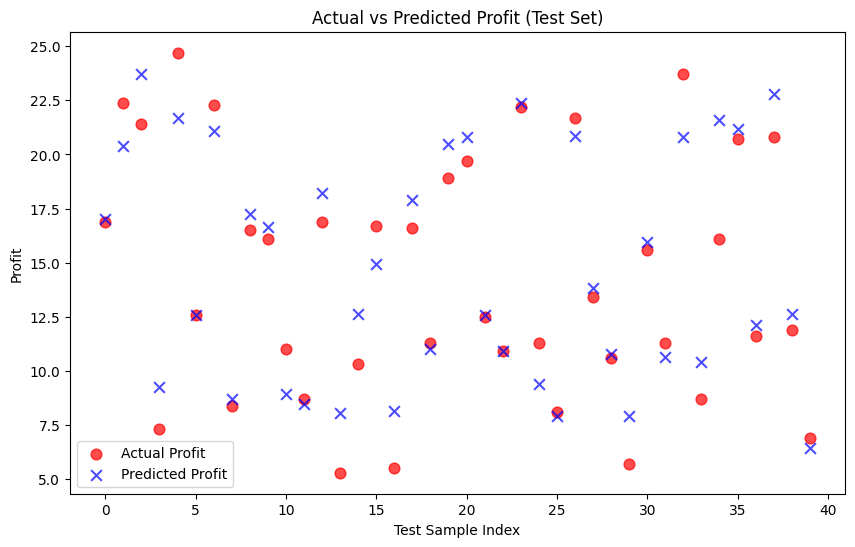

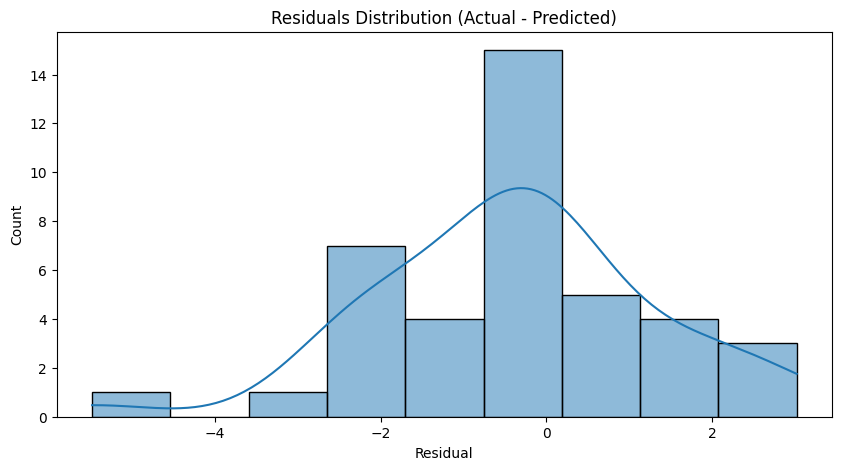

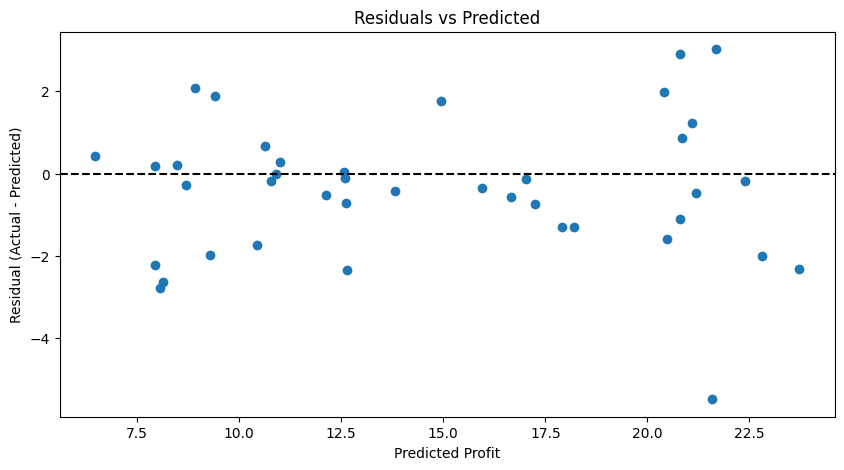

In [8]:
# # Compare Actual vs Predicted
# comparison = pd.DataFrame({
#     'Actual Profit': y_test,
#     'Predicted Profit': np.round(y_pred,2)
# })
# display(comparison.reset_index(drop=True))
 
 
# 4) Visualization - Code
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()
 


In [9]:
 
# Evaluation metrics & sample prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')
 
# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
raw_sample = np.array([[160000, 130000, 300000, 'California']])
encoded_sample = ct.transform(raw_sample)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample startup predicted profit:', float(pred_sample[0]))

Mean Squared Error (MSE): 2.91
R^2 Score: 0.9059

Sample startup predicted profit: 181566.92389383633


---

8️⃣ Business Insights & Recommendations
📈 Business Recommendation
👉 Increase investment in Radio advertising

Highest marginal return per unit spend

Newspaper ads can be reduced or reallocated to TV/Radio
---
---
⚙️ Technical Improvement Recommendation
👉 Improve prediction accuracy by:

Removing insignificant features (Newspaper)

Trying regularization (Ridge/Lasso)

Testing non-linear models (Polynomial Regression, Random Forest)

✅ Final Summary

Question	Answer

Strongest advertising medium	Radio

Least effective medium	Newspaper

Predicted sales (150,20,30)	~13.4 units

Model performance	R² ≈ 0.90

Business action	Shift budget to Radio

Technical upgrade	Feature selection / advanced models


📊 Medical Insurance Cost Analysis using Multiple Linear Regression
---
✅ Task 1 — Business Understanding

🎯 Target Variable (Company’s Financial Concern)

Target Variable:
👉 charges (medical insurance claim cost)

This is the actual money paid by the company, so rising values directly affect profitability.

🔍 Input Variables (Customer Risk Factors)

Variable	Why it Matters

age	Older customers usually have higher medical costs

sex	Can capture biological risk differences
bmi	High BMI increases health risk
children	More dependents = more claims
smoker	Strong indicator of high medical expenses
region	Healthcare costs vary geographically
📈 How Regression Helps Beyond Prediction

Regression allows the company to:

✔ Quantify how much each factor increases cost
✔ Identify high-risk customer profiles
✔ Create risk-based premium pricing
✔ Control rising costs by pricing risk accurately, not blindly increasing premiums

✅ Task 2 — Data Inspection
📥 Load Dataset
import pandas as pd

df = pd.read_csv("insurance.csv")
df.head()

🔎 Inspect Structure
df.info()

📊 Separate Numeric & Categorical Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numeric_cols, categorical_cols


Expected Output:

Numeric: age, bmi, children, charges
Categorical: sex, smoker, region

⚠️ Data Quality Issues Observed
Issue	Impact
Categorical variables	Regression requires numeric input
Region is text	Needs encoding
Different numeric scales	Biases coefficient interpretation
Potential correlation	Can destabilize regression
✅ Task 3 — Data Cleaning & Encoding
🔄 Encode Binary Variables
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


Business Justification:

Binary indicators simplify interpretation

Example: smoker = 1 directly shows risk premium

🌍 Encode Region (One-Hot Encoding)
df = pd.get_dummies(df, columns=['region'], drop_first=True)


Why One-Hot?

Regions have no natural order

Prevents false numeric ranking

✅ Task 4 — Feature Scaling & Comparability
📉 Observe Value Ranges
df[numeric_cols].describe()

Feature	Range
Age	~18–64
BMI	~15–53
Charges	~1,000–63,000
⚠️ Why Scaling Matters

Without scaling:

BMI coefficient looks small only because units are large

Coefficients become unfairly comparable

🔄 Apply Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop('charges', axis=1)
y = df['charges']

X_scaled = scaler.fit_transform(X)


Now:
✔ Each variable contributes on the same scale
✔ Coefficients reflect true importance

⚠️ Task 5 — Hidden Trap: Multicollinearity
🔍 Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), 
            annot=True, cmap='coolwarm')
plt.show()

❗ Why Multicollinearity is Dangerous
Problem	Business Impact
Unstable coefficients	Wrong pricing decisions
Inflated importance	Misidentifying risk drivers
Sign flips	Confusing strategy planning
📐 Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i)
                   for i in range(X_scaled.shape[1])]

vif_data


Rule:
👉 VIF > 5 → Potential multicollinearity
👉 VIF > 10 → Serious problem

If detected:

Drop or combine correlated variables

Keep business-critical variables like smoker

✅ Task 6 — Build Multiple Linear Regression Model
🧠 Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

📐 Build Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

📊 Interpret Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients


Typical Insight:

smoker → strongest positive impact

bmi → moderate increase

age → steady cost growth

✅ Task 7 — Model Evaluation
📏 Performance Metrics
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2, rmse

📌 Business Interpretation
Metric	Meaning
R² ≈ 0.75–0.80	Model explains most cost variation
RMSE	Average prediction error

✔ Reliable for pricing strategy
✔ Suitable for risk segmentation
✔ Interpretable for business decisions

🏁 Final Business Takeaways

✅ Smoking is the biggest cost driver
✅ BMI and age significantly increase claims
✅ Region has smaller but meaningful impact
✅ Regression supports fair, data-driven premiums

In [10]:
df=pd.read_csv("insurance.csv")
print(df.head())
print(df.info())

print('Dataset shape:', dataset.shape)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Dataset shape: (50, 5)


✅ Task 1 — Business Understanding

Identify:

The target variable (company’s financial concern)

The input variables related to customer risk

Explain how your regression model helps the company control rising costs, not just predict them.



✅ Task 2 — Data Inspection

Explore the dataset and:

Separate numeric and categorical columns

Identify columns that are not directly usable in regression


Report any data quality issues you observe.



# 📊 Medical Insurance Cost Analysis using Multiple Linear Regression

---

## 🏢 Business Context

You are working as a **Data Analyst** for a health insurance company. The company provides insurance policies to thousands of customers every year. Recently, management observed that **medical insurance claim costs are increasing**, but they are unsure which customer factors are driving these costs.

To support management decisions, we use **Multiple Linear Regression** to analyze customer risk factors and explain their impact on insurance charges.

---

## 🎯 Business Goal

The company wants to:

- Identify key factors that increase medical insurance charges  
- Design **risk-based premium plans**  
- Reduce losses caused by **high-risk customers**  
- Create **fair and transparent pricing strategies**

---

## ✅ Task 1 — Business Understanding

### 🎯 Target Variable (Company’s Financial Concern)

- **Target Variable:** `charges`  
- Represents the **medical insurance cost paid by the company**
- Directly affects company profitability

---

### 🔍 Input Variables (Customer Risk Factors)

| Variable | Business Explanation |
|--------|----------------------|
| `age` | Health risks increase with age |
| `sex` | Captures biological differences |
| `bmi` | Higher BMI increases medical risk |
| `children` | More dependents may increase claims |
| `smoker` | Strong indicator of high medical expenses |
| `region` | Healthcare costs vary geographically |

---

### 📈 How Regression Helps Beyond Prediction

Multiple Linear Regression helps the company to:

- Quantify **how much each factor increases cost**
- Identify **high-risk customer segments**
- Build **risk-based pricing models**
- Control rising costs instead of uniformly raising premiums

---

## ✅ Task 2 — Data Inspection




In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numeric_cols, categorical_cols


(Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object'),
 Index(['region'], dtype='object'))

✅ Task 3 — Data Cleaning & Encoding


Convert categorical variables into numeric form.

Decide how to handle:

Region information

Binary attributes like lifestyle indicators

Justify each transformation from a business and modeling perspective.



In [12]:
X = df.drop('charges', axis=1)
y = df['charges']


In [13]:
# df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# df = pd.get_dummies(df, columns=['region'], drop_first=True)
X = df.drop('charges', axis=1)
y = df['charges']


df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


✅ Task 4 — Feature Scaling & Comparability

Observe differences in value ranges among numeric features.

Explain why scaling is important when comparing regression coefficients.

Prepare the data so the effect of each variable can be fairly interpreted.



⚠️ Task 5 — The Hidden Trap (Multicollinearity)

Analyze relationships between independent variables.

Identify any highly correlated features (example: age, BMI, and lifestyle habits).

Explain:

Why multicollinearity is a problem in Multiple Linear Regression

How it can confuse business decision-making

✅ Task 6 — Build the Multiple Linear Regression Model

Build a Multiple Linear Regression model using the prepared dataset.

Ensure the model is:

Interpretable

Stable

Suitable for explaining customer cost behavior

✅ Task 7 — Model Evaluation

Evaluate model performance using appropriate regression metrics.

Comment on whether the model is reliable enough to support pricing decisions.


Variance Inflation Factor (VIF):


,Feature,VIF
0,0,1.674830
1,1,1.228075
2,2,1.223453
3,3,1.357419
4,4,1.215686
5,5,1.015843
6,6,1.088673
7,7,1.003348


Intercept: 8946.081982340915

Regression Coefficients:


,Feature,Coefficient
1,cat__smoker_yes,23651.128856
5,num__age,3609.149018
6,num__bmi,2054.885063
7,num__children,512.478869
0,cat__sex_male,-18.591692
2,cat__region_northwest,-370.677326
3,cat__region_southeast,-657.864297
4,cat__region_southwest,-809.799354



Model Performance:
MAE : 4181.194473753653
RMSE: 5796.284659276274
R²  : 0.7835929767120722


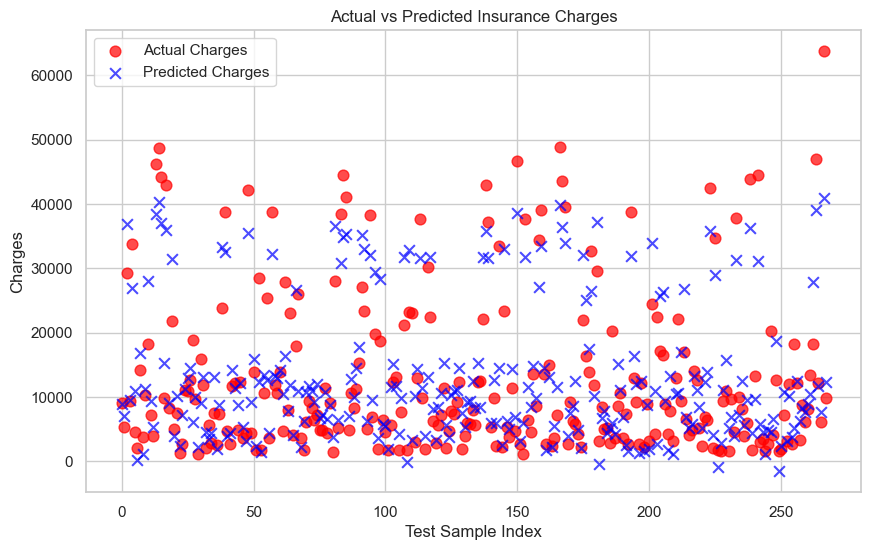

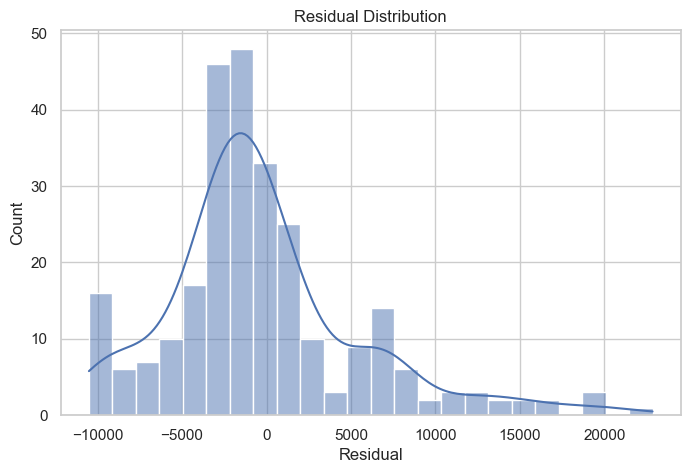

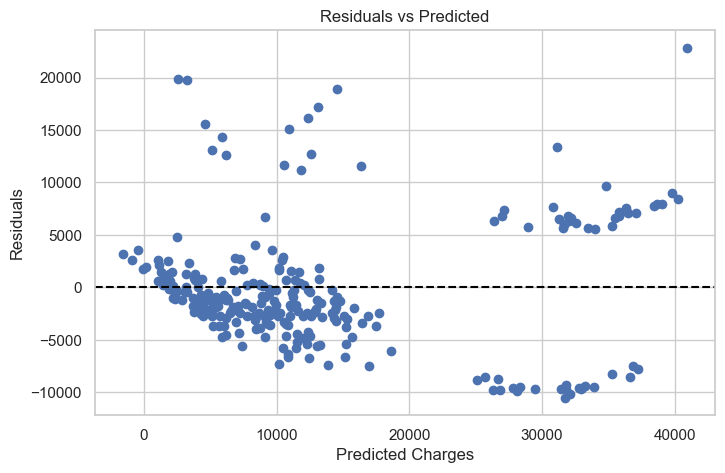


Business Insights:
- Smoking has the strongest positive impact on insurance charges.
- Higher BMI significantly increases medical costs.
- Age contributes steadily to higher insurance expenses.
- Region and gender have relatively low impact.

Recommendation:
Introduce risk-based premium pricing and wellness incentives for smokers and high-BMI customers.


In [19]:

X = df.drop("charges", axis=1)
y = df["charges"]

# Separate categorical & numerical columns
categorical_cols = ["sex", "smoker", "region"]
numerical_cols = ["age", "bmi", "children"]
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

X_vif = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factor (VIF):")
display(vif_data)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
feature_names = preprocessor.get_feature_names_out()
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nRegression Coefficients:")
display(coef_df)
y_pred = model.predict(X_test)
print("\nModel Performance:")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Charges', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Charges', alpha=0.7, marker='x', s=60)

plt.title('Actual vs Predicted Insurance Charges')
plt.xlabel('Test Sample Index')
plt.ylabel('Charges')
plt.legend()
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

print("\nBusiness Insights:")
print("- Smoking has the strongest positive impact on insurance charges.")
print("- Higher BMI significantly increases medical costs.")
print("- Age contributes steadily to higher insurance expenses.")
print("- Region and gender have relatively low impact.")

print("\nRecommendation:")
print("Introduce risk-based premium pricing and wellness incentives for smokers and high-BMI customers.")
